In [25]:
%load_ext autoreload
%autoreload 2

from run_models import load_model
from plot_utils import *
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF, DisruptionPredictorTinguely
from Experiments import Experiment
from plot_experiments import *

horizons = np.linspace(0.001, 0.3, 11)

device = 'cmod'
#dataset = 'random100'
dataset = '5k_random_256_shots_60%_flattop'
test_dataset = dataset+'_test'

#temporal_dataset = '5k_random_256_shots_60%_flattop'
#test_temporal_dataset = temporal_dataset+'_test'

# Load models and create disruption predictors

cph_model, cph_transformer, cph_features = load_model('cph', device, dataset)
cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, cph_features, cph_transformer)

#cph_temporal_model, cph_transformer, cph_features = load_model('cph', device, temporal_dataset)
#cph_temporal_predictor = DisruptionPredictorSM("Cox Proportional Hazards Temporal", cph_temporal_model, cph_features, cph_transformer)

dcph_model, dcph_transformer, dcph_features = load_model('dcph', device, dataset)
dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, dcph_features, dcph_transformer)

dcm_model, dcm_transformer, dcm_features = load_model('dcm', device, dataset)
dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, dcm_features, dcm_transformer)

dsm_model, dsm_transformer, dsm_features = load_model('dsm', device, dataset)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, dsm_features, dsm_transformer)

#rsf_model, rsf_transformer, rsf_features = load_model('rsf', device, dataset)
#rsf_predictor = DisruptionPredictorSM("Random Survival Forest", rsf_model, rsf_features, rsf_transformer)

rf_model, rf_transformer, rf_features = load_model('rf', device, dataset)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, rf_features, rf_transformer)

ting_model, ting_transformer, ting_features = load_model('rf', device, dataset)
ting_predictor = DisruptionPredictorTinguely("Tinguely et al. 2019", ting_model, ting_features, ting_transformer)

# Create experiments for each predictor
cph_experiment = Experiment(device, test_dataset, cph_predictor, 'CPH')
#cph_temporal_experiment = Experiment(device, test_temporal_dataset, cph_temporal_predictor, 'CPH Temporal')
dcph_experiment = Experiment(device, test_dataset, dcph_predictor, 'DCPH')
dcm_experiment = Experiment(device, test_dataset, dcm_predictor, 'DCM')
dsm_experiment = Experiment(device, test_dataset, dsm_predictor, 'DSM')
#rsf_experiment = Experiment(device, test_dataset, rsf_predictor, 'RSF')
rf_experiment = Experiment(device, test_dataset, rf_predictor, 'RF')
ting_experiment = Experiment(device, test_dataset, ting_predictor, 'Tinguely')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded model from models/cph_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/dcph_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/dcm_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/dsm_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_5k_random_256_shots_60%_flattop.pkl
Loaded model from models/rf_cmod_5k_random_256_shots_60%_flattop.pkl


c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.all_data[predictor.features] = self.feature_data
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.all_data[predictor.features] = self.feature_data
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:37: PerformanceWarning: DataFrame is highly fragme

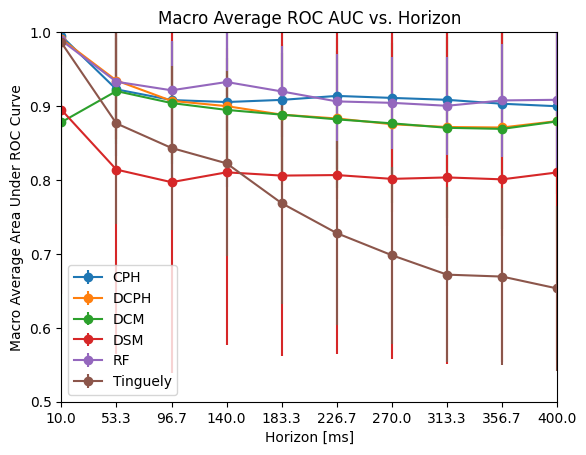

In [26]:
# Run the experiments
experiment_list = [cph_experiment, dcph_experiment, dcm_experiment, dsm_experiment, rf_experiment, ting_experiment]
#experiment_list = [ting_experiment]
#experiment_list = [cph_experiment, cph_temporal_experiment]
plot_roc_auc_vs_horizon_macro(experiment_list)



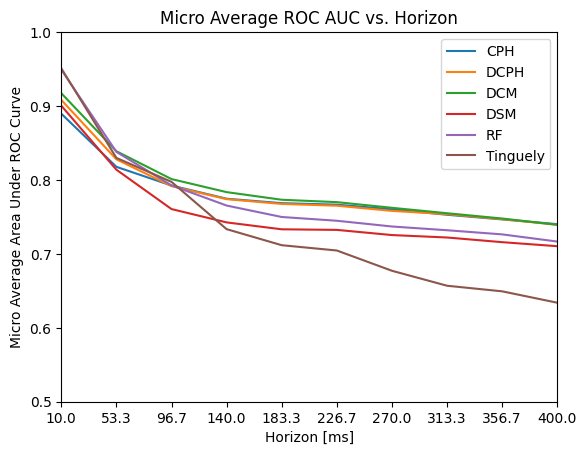

In [24]:
plot_roc_auc_vs_horizon_micro(experiment_list)

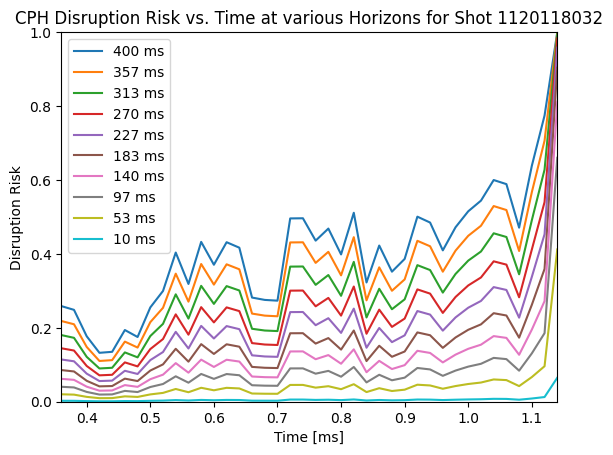

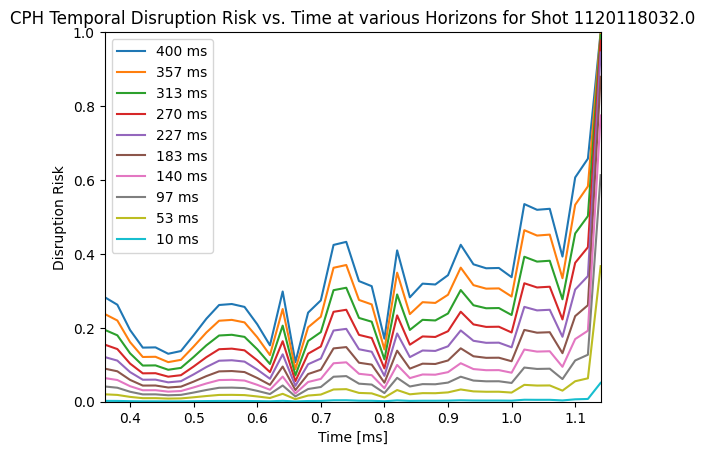

In [13]:
for experiment in experiment_list:
    plot_risk_compare_horizons(experiment, experiment.get_disruptive_shot_list()[1])

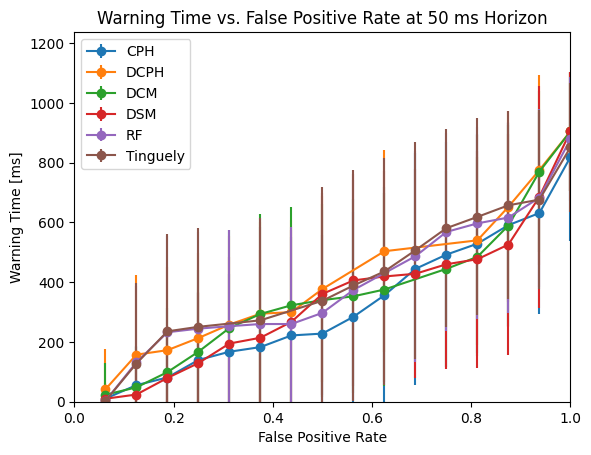

In [43]:
plot_warning_time_vs_FPR(experiment_list, 0.05)

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\Experiments.py:247: RuntimeWarning: invalid value encountered in divide
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\.venv\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encount

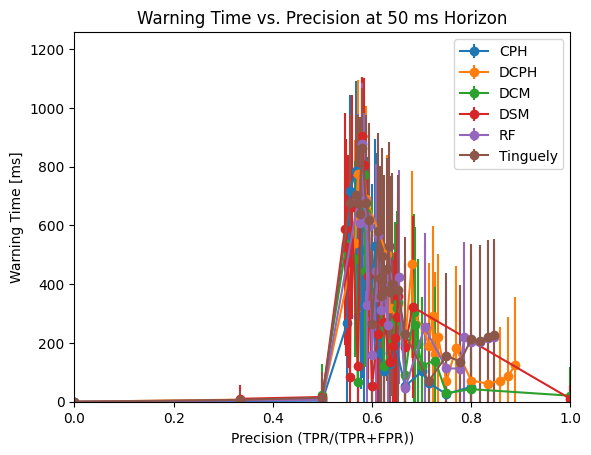

In [47]:
plot_warning_time_vs_precision(experiment_list, 0.05)